<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Lab Assignment 4 </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Name: Yifeng Wu </h2>

# Labor markets and returns to schooling
For this problem you will use the dataset supplied via Canvas, filename: “Card_Returns.dta”, which is taken from Card, David (1995) “Using Geographic Variation in College Proximity to Estimate the Returns to Schooling," in Aspects of Labour Market Behavior: Essays in Honour of John Vanderkamp, ed. L. H. Christophides, E. K. Grand, and R. Swidinsky. Toronto: University of Toronto Press: 201-222. The data measure a variety of characteristics of individuals and include data on the proximity of two- and four-year colleges.

Familiarize yourself with the data based on the accompanying PDF of Card’s working paper. Note where the data are originally from, what kind of sampling was involved, and the units of observation.

Pay particular attention to the following variables and ensure you know what they measure and in what units: wage, educ, exper, exper2. You may have to infer the units of measurement from the variable distributions. 

For your writeup, present a table that shows sample means, standard deviations, and minimum/maximum values for the wage, educ, exper variables (call this Table 1). In a note to this table, say how many observations are in the dataset and how many variables there are. Also present a scatter plot of wage by education in a way you think makes sense. Call this Figure 5.

Run the following regressions:

Specification 1: $ln⁡(wage)=\beta_0+\beta_1 (educ)+u_i$ 

Specification 2: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+u_i$

Specification 3: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+\beta_3 (expersq)+u_i$

Specification 4: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+u_i$

Specification 5: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+\beta_5(black)+u_i$ 

* For the married variable show two different ways of creating a dummy variable to incorporate in your regression. 

* Present a regression output table (Table 2). Below the set of tables, provide discussion of the parameter estimates for Specification 5 (interpret the fitted values for $\beta_0$,$\beta_1$,$\beta_2$,$\beta_3$,$\beta_4$,$\beta_5$). Comment on any major changes you see between Specification 5 and Specification 2.

* When a worker gains one more year of experience, by how much is the wage expected to increase, on average? Discuss differences in the parameter estimates in specifications 2 and 3. (Hint: Take the derivative of each with respect to experience.)

* State the first two algebraic properties of the OLS estimator. Verify that these properties hold in Specification 1 and Specification 5. *(Hint: You will be able to do this by predicting the residuals into the data, and then using the “sum” function on the variables.)*



* Package Setup

In [1]:
import scipy.stats as stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

* Table that shows sample means, standard deviations, and minimum/maximum values for the wage, educ, exper variables (call this Table 1).

In [2]:
data = pd.read_stata('/Users/yifeng/Downloads/card.dta')
Table_1 = data[['wage', 'educ', 'exper']].agg(['mean', 'std', 'min', 'max'])
Table_1


,wage,educ,exper
mean,577.282392,13.263455,8.856146
std,262.958302,2.676913,4.141672
min,100.000000,1.000000,0.000000
max,2404.000000,18.000000,23.000000


* The dataset has 3010 observations and 34 variables.

In [3]:
data.shape

(3010, 34)

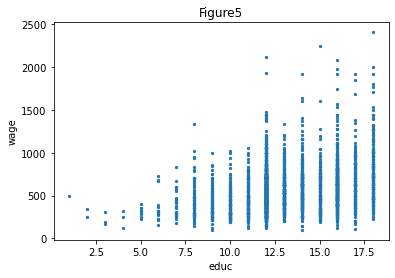

In [4]:
Figure5 = data.plot.scatter(x='educ', y='wage', s=5, title='Figure5')

* Run the followng regressions

In [5]:
# set each regression
s1 = smf.ols(formula = 'np.log(wage) ~ educ', data = data).fit()
s2 = smf.ols(formula = 'np.log(wage) ~ educ + exper', data = data).fit()
s3 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq', data = data).fit()
s4 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + married', data = data).fit()
s5 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + married + black', data = data).fit()

* For the married variable show two different ways of creating a dummy variable to incorporate in your regression. 



In [6]:
#Method 1: incorporate I(formula) into the regression
s4 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + I(married ==1)', data = data).fit()
s5 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + I(married == 1) + black', data = data).fit()



#Method 2: create new variable
data['ismarried'] = (data['married']==1)
s4 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + ismarried', data = data).fit()
s5 = s5 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + ismarried + black', data = data).fit()

* Present a regression output table (Table 2). Below the set of tables, provide discussion of the parameter estimates for Specification 5 (interpret the fitted values for $\beta_0$,$\beta_1$,$\beta_2$,$\beta_3$,$\beta_4$,$\beta_5$). Comment on any major changes you see between Specification 5 and Specification 2.

In [7]:
s1 = smf.ols(formula = 'np.log(wage) ~ educ', data = data).fit()
s2 = smf.ols(formula = 'np.log(wage) ~ educ + exper', data = data).fit()
s3 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq', data = data).fit()
s4 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + I(married==1)', data = data).fit()
s5 = smf.ols(formula = 'np.log(wage) ~ educ + exper + expersq + I(married==1) + black', data = data).fit()

Table2 = Stargazer([s1, s2, s3, s4, s5])
Table2.title('Regression on Wages')

HTML(Table2.render_html())

* Ans: 
* $\beta_0$: The intercept denotes the wage you get if all other parameters equal to zero(zero years of eduction, zero years of experience,single, non-black)

* $\beta_1$: the expected percentage increase in wage if a worker gains one or more years of education, while all other parameters being equal. For example, in specification5, a worker is expected to have 8% increase in wage if he/she gains one more year of education.

* $\beta_2$:the expected percentage increase in wage if a worker gains one or more years of work experience, while all other parameters being equal. For example, in specification5, a worker is expected to have 8% increase in wage if he/she gains one more year of work experience.

* $\beta_3$: the estimator of the square of experience, which stands for the quadratic relationship between work experience and the wage. When we take derivative of the parameter with respect to experience, it becomes -0.004experience, meaning that the wage increases at a decreasing rate of 0.4% when workers get one extra year of work experience. 

* $\beta_4$:the aproximate difference in wage between 'single' and 'married', which is 0.124, meaning that the wage of the married is expected to be 12.4% higher than that of single.   

* $\beta_5$:the aproximate difference in wage between 'black' and 'nonblack', which is -0.214, meaning that the wage of the black is expected to be 21.4% lower than that ofnonblack.   

* Major Change: Specification5 has more regressors('black', 'married', 'expersq) than specification2. Therefore, s5 is able to better predict the change of wage than s2 and have higher amount of expained variance(0.256 > 0.181) and lower residual errors(0.383 < 0.402). Also, the estimators of regressors('educ' and 'exper') in s5 are smaller than those of s2. This might be resulted from the fact that the newly added independetn variables are somewhat correlated to the existing variables and therefore change their coefficients. 

* When a worker gains one more year of experience, by how much is the wage expected to increase, on average? Discuss differences in the parameter estimates in specifications 2 and 3. (Hint: Take the derivative of each with respect to experience.)

* Ans: in specification 2, when a worker hains one more year of experience, the wage is expected to on average increase 4.1%, 9.0%, 7.9%, 8.0%, in s2, s3, s4, s5, respectively. Specification 3 has one more regressor expersq. With this new regressor, we do not interpret the exper variable in isolation. By taking the derivative of each parameter with respect to experience, we can tell that the differences occur in the parameters exper and expersq. (specification2 = 0.041. specification3 = 0.090 - 0.004exper). Solving the derivative equation gives you the turning point of the relationship between experience and wage. That is, as experience grows, people have higher wage at a decreasing rate and at some point, the wage does not grow and start to fall (possibly retirement). 

* State the first two algebraic properties of the OLS estimator. Verify that these properties hold in Specification 1 and Specification 5. *(Hint: You will be able to do this by predicting the residuals into the data, and then using the “sum” function on the variables.)*

* Ans:
* Property 1: the sum of OLS residuals is zero
* Property 2: the sample covariance between the regressor and the OLS residuals is zero

In [8]:
#Model 1 Property 1
s1_p1 = s1.resid.sum()
print('\n Specification 1 Property 1 for s1', s1_p1)

#Model 1 Property 2
#covar = s1.resid.cov(data['educ'])
covar = (s1.resid * data['educ']).sum()
print('\n Specification 1 Property 2 for s1', covar)

#Model 5 Property 1
s5_p1 = s5.resid.sum()
print('\n Specification 5 Property 1 for s5', s5_p1)

#Model 5 Property 2
covar_list = []
variables = ['educ', 'exper', 'expersq', 'ismarried', 'black']
for var in variables:
    covar = (s5.resid * data[var]).sum()
    covar_list.append(covar)

print('\n Specification 5 Property 2 for s5', covar_list)



 Specification 1 Property 1 for s1 -2.6616930881573353e-11

 Specification 1 Property 2 for s1 -3.942659532185644e-10

 Specification 5 Property 1 for s5 8.358611580661091e-10

 Specification 5 Property 2 for s5 [9.868358574749436e-09, 1.0290932550560683e-08, 1.408534444635734e-07, 6.482991921075154e-10, 2.3565505102851603e-10]


* Based on the results above, the sum of residuals and the sample covariance for s1 and s5 are all very small numbers. The differences between the sum and zero can be ignored, and therefore the properties are verified. 



In [9]:
!jupyter nbconvert --to html Assignment4F22.ipynb

[NbConvertApp] Converting notebook Assignment4F22.ipynb to html
[NbConvertApp] Writing 586134 bytes to Assignment4F22.html
